# <h1><center><font color=purple> P168 -  Cars24 Revenue Prediction (Group 4)</font></center></h1>

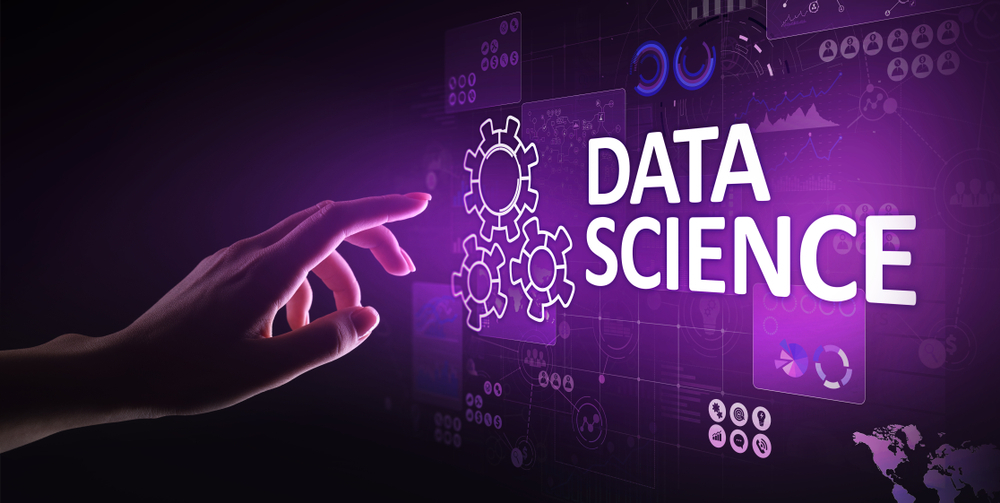

## <h1><center><font color=purple>Business Objective</font></center></h1>


As we know the concept of Data science and ML is useful in many of the domains, in which one of the emerging domains is Automobile. As we can upfront build predictive models to forecast the revenue of the company, loyal customers analysis. Survival period of the machines etc and a lot of analysis we can perform and prescribe too. 

Now we are working on the cars segment where a lot of purchases and sales increased rapidly especially because of the COVID. So, we have a requirement like what's the revenue made by companies like cars24, carwale, spinny even their company margin also increase predominantly. So that if a client establishes the business whether they can survive in the present market, and at what % of market share will be hold by the different companies. 

So, we are considering cars 24 websites to scrape the data and perform the analysis.


## <h1><center><font color=purple>Importing Libraries</font></center></h1>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

## <h1><center><font color=purple>Importing Datasets</font></center></h1>

In [2]:
cars = pd.read_csv("cars1_1.csv")
cars

Company                      Car_name  Model_year         History  \
0      Maruti                  Alto 800 VXI      2016.0  Non-Accidental   
1     Hyundai  NEW SANTRO 1.1 SPORTZ MT CNG      2018.0  Non-Accidental   
2      Maruti           Wagon R 1.0 LXI CNG      2017.0  Non-Accidental   
3      Maruti               Wagon R 1.0 LXI      2014.0  Non-Accidental   
4       Honda             City VX MT PETROL      2015.0  Non-Accidental   
...       ...                           ...         ...             ...   
4955   Maruti                  Alto 800 LXI      2018.0  Non-Accidental   
4956  Hyundai                  Eon ERA PLUS      2016.0  Non-Accidental   
4957   Maruti               Ertiga ZDI SHVS      2017.0  Non-Accidental   
4958  Hyundai          i10 MAGNA 1.2 KAPPA2      2012.0  Non-Accidental   
4959  Renault                      Kwid RXL      2020.0  Non-Accidental   

     Kilometers Registered in      Owner Transmission Registration State  \
0          9666        16-Dec  1st Owner       MANUAL        MH-12    MH   
1         39397        18-Dec  1st Owner          NaN        MH-04    MH   
2         66693        17-Nov  2nd Owner       MANUAL        MH-12    MH   
3         40532        14-Feb  2nd Owner       MANUAL        MH-02    MH   
4         60086        15-Jun  1st Owner       MANUAL        MH-14    MH   
...         ...           ...        ...          ...          ...   ...   
4955      41009           NaN  2nd Owner       MANUAL        RJ-23    RJ   
4956      40136        16-Jul  1st Owner       MANUAL        RJ-14    RJ   
4957     242614        17-Mar  1st Owner       MANUAL        RJ-02    RJ   
4958     116147           NaN  2nd Owner       MANUAL        RJ-14    RJ   
4959      42570        20-Aug  2nd Owner       MANUAL        RJ-06    RJ   

         Fuel_Type  Mileage  Fuel_capacity Seating_capacity    City   Price  
0           Petrol     24.7           35.0                5    Pune  323999  
1     Petrol + CNG     30.0           60.0                5    Pune  573499  
2     Petrol + CNG     26.6           35.0                5    Pune  482399  
3           Petrol     20.5           35.0                5    Pune  367599  
4           Petrol     17.8           40.0                5    Pune  701799  
...            ...      ...            ...              ...     ...     ...  
4955        Petrol     24.7           35.0                5  Jaipur  265199  
4956        Petrol     21.1           32.0                5  Jaipur  284499  
4957        Diesel     24.5           45.0                7  Jaipur  706199  
4958        Petrol     20.6           35.0                5  Jaipur  251199  
4959        Petrol     25.0           28.0                5  Jaipur  376299  

[4960 rows x 16 columns]

In [3]:
cars.shape

(4960, 16)

## <h1><center><font color=purple>Exploratory Data Analysis (EDA)</font></center></h1>

In [4]:
#Renaming Colunmn 
cars.rename(columns = {'Car_name':'Model_name'}, inplace = True)

In [5]:
#Looking for null values
cars.isnull().sum()

Company              18
Model_name           14
Model_year           18
History              29
Kilometers           14
Registered in       119
Owner                31
Transmission        332
Registration         21
State                14
Fuel_Type            28
Mileage             709
Fuel_capacity       591
Seating_capacity    574
City                 14
Price               588
dtype: int64

<AxesSubplot:title={'center':'Heatmap for null values'}>

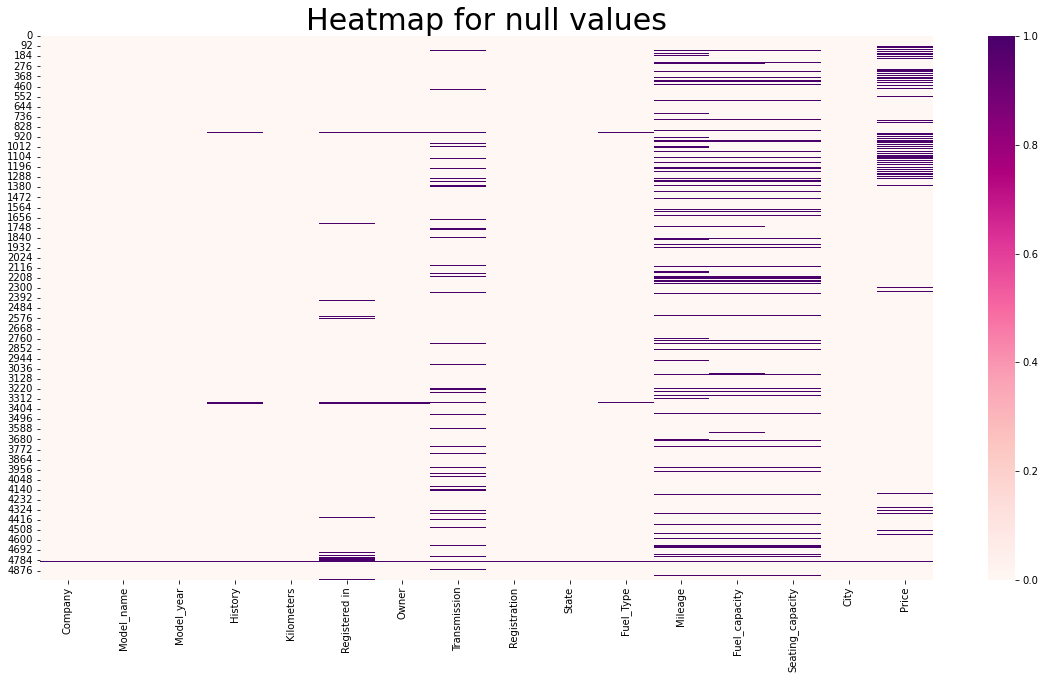

In [6]:
# Heatmap for null values
plt.figure(figsize=(20,10))
plt.title("Heatmap for null values",fontsize= 30)
sns.heatmap(cars.isnull(), cbar=True , cmap="RdPu",vmin=0) 

Inference :

1) We observe null values in multiple columns such as Mileage, Price, transmission etc.<br>
2) Web scraper was not able to extract the above data or was missing in the webpage itself.

In [7]:
# Droping null Values
cars = cars.dropna().reset_index(drop=True)
cars

Company                Model_name  Model_year         History  \
0         Maruti              Alto 800 VXI      2016.0  Non-Accidental   
1         Maruti       Wagon R 1.0 LXI CNG      2017.0  Non-Accidental   
2         Maruti           Wagon R 1.0 LXI      2014.0  Non-Accidental   
3          Honda         City VX MT PETROL      2015.0  Non-Accidental   
4         Maruti             Ciaz VXI PLUS      2016.0  Non-Accidental   
...          ...                       ...         ...             ...   
3496     Hyundai              Eon ERA PLUS      2016.0  Non-Accidental   
3497  Volkswagen  Polo HIGHLINE1.2L PETROL      2017.0  Non-Accidental   
3498     Hyundai              Eon ERA PLUS      2016.0  Non-Accidental   
3499      Maruti           Ertiga ZDI SHVS      2017.0  Non-Accidental   
3500     Renault                  Kwid RXL      2020.0  Non-Accidental   

     Kilometers Registered in      Owner Transmission Registration State  \
0          9666        16-Dec  1st Owner       MANUAL        MH-12    MH   
1         66693        17-Nov  2nd Owner       MANUAL        MH-12    MH   
2         40532        14-Feb  2nd Owner       MANUAL        MH-02    MH   
3         60086        15-Jun  1st Owner       MANUAL        MH-14    MH   
4         29544        16-Dec  1st Owner       MANUAL        MH-12    MH   
...         ...           ...        ...          ...          ...   ...   
3496      38453        16-Jun  1st Owner       MANUAL        RJ-14    RJ   
3497      52422        17-Sep  2nd Owner       MANUAL        RJ-14    RJ   
3498      40136        16-Jul  1st Owner       MANUAL        RJ-14    RJ   
3499     242614        17-Mar  1st Owner       MANUAL        RJ-02    RJ   
3500      42570        20-Aug  2nd Owner       MANUAL        RJ-06    RJ   

         Fuel_Type  Mileage  Fuel_capacity Seating_capacity    City   Price  
0           Petrol     24.7           35.0                5    Pune  323999  
1     Petrol + CNG     26.6           35.0                5    Pune  482399  
2           Petrol     20.5           35.0                5    Pune  367599  
3           Petrol     17.8           40.0                5    Pune  701799  
4           Petrol     20.7           43.0                5    Pune  682099  
...            ...      ...            ...              ...     ...     ...  
3496        Petrol     21.1           32.0                5  Jaipur  296599  
3497        Petrol     16.5           45.0                5  Jaipur  554099  
3498        Petrol     21.1           32.0                5  Jaipur  284499  
3499        Diesel     24.5           45.0                7  Jaipur  706199  
3500        Petrol     25.0           28.0                5  Jaipur  376299  

[3501 rows x 16 columns]

In [8]:
cars[cars.duplicated()] #no duplicates found

Empty DataFrame
Columns: [Company, Model_name, Model_year, History, Kilometers, Registered in, Owner, Transmission, Registration, State, Fuel_Type, Mileage, Fuel_capacity, Seating_capacity, City, Price]
Index: []

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           3501 non-null   object 
 1   Model_name        3501 non-null   object 
 2   Model_year        3501 non-null   float64
 3   History           3501 non-null   object 
 4   Kilometers        3501 non-null   object 
 5   Registered in     3501 non-null   object 
 6   Owner             3501 non-null   object 
 7   Transmission      3501 non-null   object 
 8   Registration      3501 non-null   object 
 9   State             3501 non-null   object 
 10  Fuel_Type         3501 non-null   object 
 11  Mileage           3501 non-null   float64
 12  Fuel_capacity     3501 non-null   float64
 13  Seating_capacity  3501 non-null   object 
 14  City              3501 non-null   object 
 15  Price             3501 non-null   object 
dtypes: float64(3), object(13)
memory usage: 43

In [10]:
cars['Model_year'] = cars['Model_year'].astype(int)
cars['Fuel_capacity'] = cars['Fuel_capacity'].astype(int)
cars['Seating_capacity'] = cars['Seating_capacity'].astype(int)
cars['Price'] = cars['Price'].astype(int)
cars['Kilometers'] = cars['Kilometers'].astype(int)
cars['Mileage'] = pd.to_numeric(cars['Mileage'], errors='coerce')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           3501 non-null   object 
 1   Model_name        3501 non-null   object 
 2   Model_year        3501 non-null   int32  
 3   History           3501 non-null   object 
 4   Kilometers        3501 non-null   int32  
 5   Registered in     3501 non-null   object 
 6   Owner             3501 non-null   object 
 7   Transmission      3501 non-null   object 
 8   Registration      3501 non-null   object 
 9   State             3501 non-null   object 
 10  Fuel_Type         3501 non-null   object 
 11  Mileage           3501 non-null   float64
 12  Fuel_capacity     3501 non-null   int32  
 13  Seating_capacity  3501 non-null   int32  
 14  City              3501 non-null   object 
 15  Price             3501 non-null   int32  
dtypes: float64(1), int32(5), object(10)
memory

In [11]:
cars.describe().round(3)

Model_year  Kilometers   Mileage  Fuel_capacity  Seating_capacity  \
count    3501.000    3501.000  3501.000       3501.000          3501.000   
mean     2017.272   42224.435    20.242         41.133             5.062   
std         2.541   25482.292     3.265          8.212             0.372   
min      2008.000     269.000    10.300         27.000             4.000   
25%      2016.000   22060.000    18.200         35.000             5.000   
50%      2018.000   39309.000    20.200         40.000             5.000   
75%      2019.000   59316.000    22.000         45.000             5.000   
max      2022.000  455601.000    35.600         80.000             8.000   

             Price  
count     3501.000  
mean    637697.682  
std     312148.872  
min     135099.000  
25%     427099.000  
50%     560099.000  
75%     746449.000  
max    2790699.000

In [12]:
#Number of unique entries in the dataset
print('Number of unique Car Models:',len(cars["Model_name"].unique()))
print('Number of unique Car brands:',len(cars["Company"].unique()))
print('Number of unique Model Years:',len(cars["Model_year"].unique()))
print('Number of unique States:',len(cars["State"].unique()))
print('Number of unique Cities:',len(cars["City"].unique()))
print('Number of unique Registration years:',len(cars["Registered in"].unique()))
print('Number of unique Car history types :',len(cars["History"].unique()))

Number of unique Car Models: 618
Number of unique Car brands: 17
Number of unique Model Years: 15
Number of unique States: 15
Number of unique Cities: 12
Number of unique Registration years: 155
Number of unique Car history types : 1


## <h1><center><font color=purple>Data Visualization</font><br></center></h1>

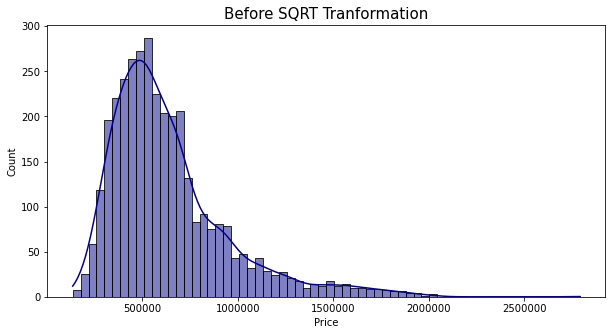

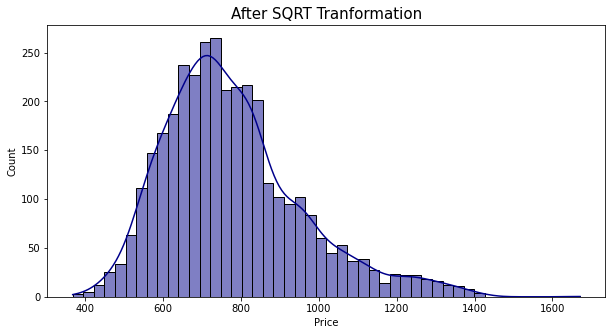

In [13]:
plt.figure(figsize=(10,5))
ax = sns.histplot(cars["Price"], color="darkblue",kde='True',stat='count')
ax.ticklabel_format(style='plain')
plt.title("Before SQRT Tranformation",fontsize = 15)
plt.show()

plt.figure(figsize=(10,5))
cars["Price"] = np.sqrt(cars["Price"])
ax = sns.histplot(cars["Price"], color="darkblue",kde='True',stat='count')
ax.ticklabel_format(style='plain')
plt.title("After SQRT Tranformation",fontsize = 15)
plt.show()

Inference:

1) We see that the price distribution shows right-skewedeness before sqrt transformation.<br>
2) Majority of the cars range from 4 lakh to 8 lakh.<br>
3) After sqrt transformation we can see that data is normally distributed.

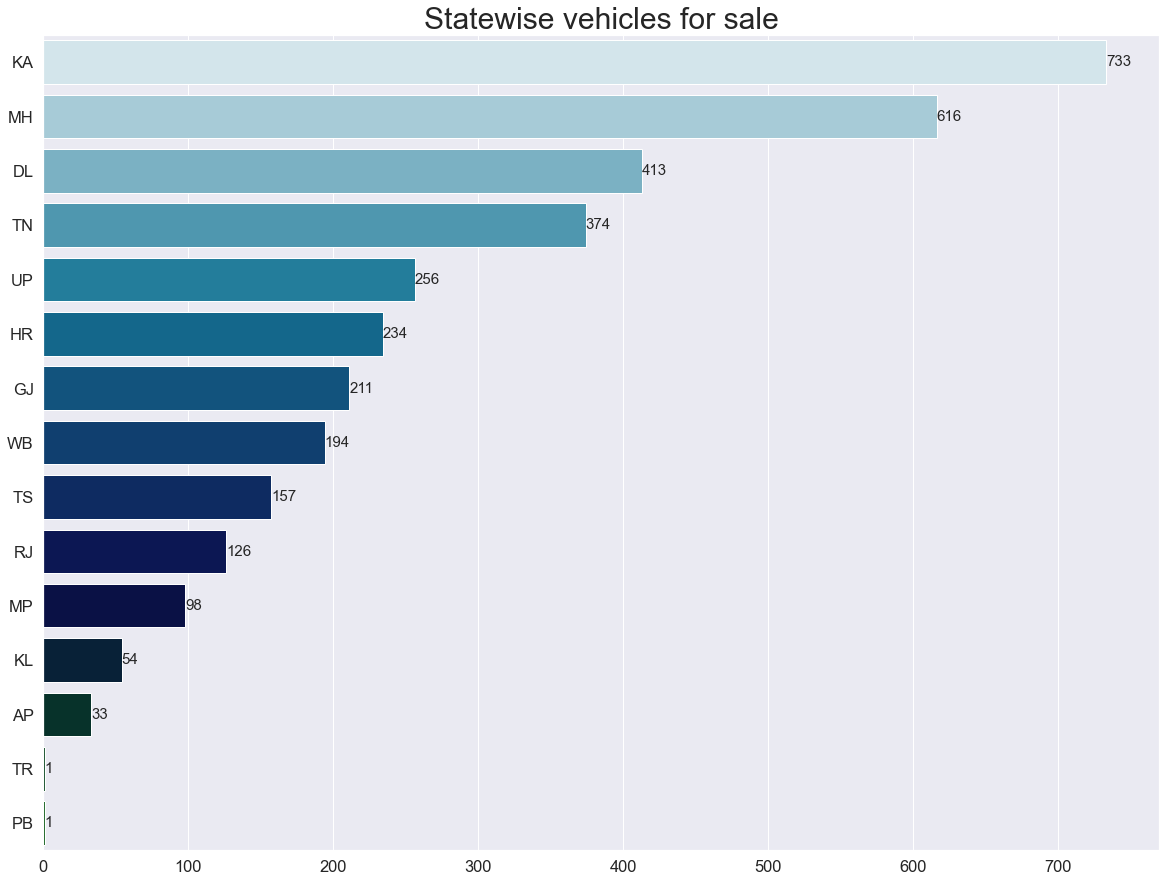

In [14]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
ax = sns.barplot(data=cars,x=cars["State"].value_counts().values,y=cars["State"].value_counts().index,palette="ocean_r")
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Statewise vehicles for sale",fontsize = 30)
plt.show()

Inference:
    
1) We performed countplots for vehicle listings Statewise.<br>
2) Karnataka has highest number of cars for sale followed by Maharashtra and Delhi.<br>
3) As the above cities are IT hubs and important economic hotspots,the number of cars for sale are more.

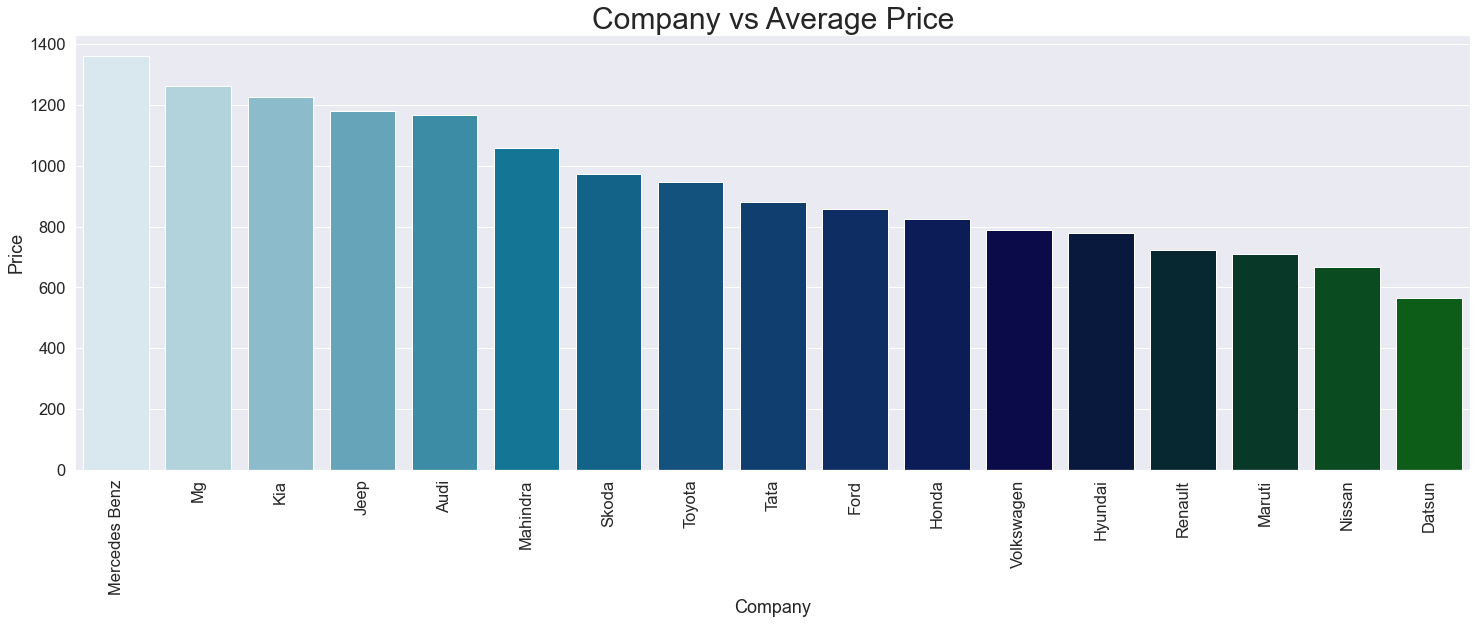

In [15]:
plt.figure(figsize=(25,8))
df = pd.DataFrame(cars.groupby(['Company'])['Price'].mean().sort_values(ascending = False)).reset_index()
ax = sns.barplot(data = df ,x = 'Company',y = 'Price', palette="ocean_r")
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.title('Company vs Average Price',fontsize = 30)
plt.show()

Inference :
1) Mercedes Benz and Mg seem to have highest average price.

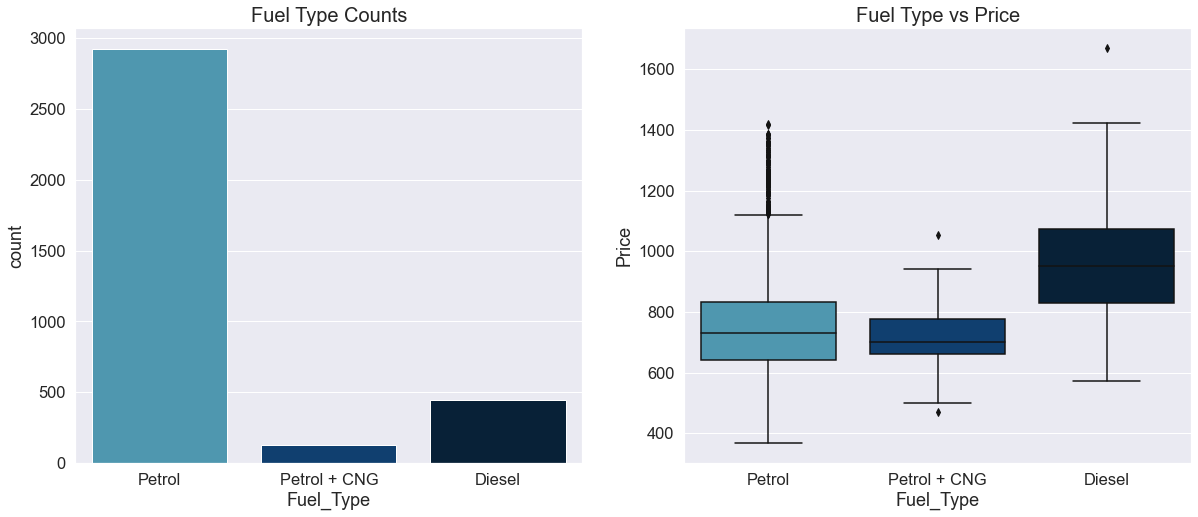

In [16]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Transmission Counts',fontsize = 20)
sns.countplot(data = cars, x = "Transmission", palette=('RdPu'))

plt.subplot(1,2,2)
plt.title('Transmission vs Price',fontsize = 20)
ax = sns.boxplot(x=cars.Transmission, y=cars.Price, palette=('RdPu'))
ax.ticklabel_format(style='plain', axis='y')
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Fuel Type Counts',fontsize = 20)
sns.countplot(data = cars, x = "Fuel_Type" , palette=("ocean_r"))

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price',fontsize = 20)
ax = sns.boxplot(x=cars["Fuel_Type"], y=cars.Price, palette=("ocean_r"))
ax.ticklabel_format(style='plain', axis='y')
plt.show()


Inference :
1) It seems automatic have higher price range than the manual. (though it has some high values outside the whiskers)<br>
2) Also it seems diesel have higher price range than the petrol and petrol+cng. (though it has some high values outside the whiskers)

In [17]:
cars[['Company']].count()
cars['Company'].value_counts()
new1 = cars['Company'].value_counts().rename_axis("Company_name").reset_index(name = "count")
y = new1["count"]
labels = new1["Company_name"]

fig_pie = px.pie(new1,names=labels, values=y,
                 color_discrete_sequence=px.colors.qualitative.Vivid)
fig_pie.update_traces(textposition='outside')
fig_pie.update_layout(showlegend=True, uniformtext_minsize=14, uniformtext_mode='hide')


Inference:

1) Above pie chart shows the marketshare of each car manufacturer.<br>
2) Maruti has the highest marketshare followed by Hyundai and Honda.

In [18]:
cars.head(2)

Company           Model_name  Model_year         History  Kilometers  \
0  Maruti         Alto 800 VXI        2016  Non-Accidental        9666   
1  Maruti  Wagon R 1.0 LXI CNG        2017  Non-Accidental       66693   

  Registered in      Owner Transmission Registration State     Fuel_Type  \
0        16-Dec  1st Owner       MANUAL        MH-12    MH        Petrol   
1        17-Nov  2nd Owner       MANUAL        MH-12    MH  Petrol + CNG   

   Mileage  Fuel_capacity  Seating_capacity  City       Price  
0     24.7             35                 5  Pune  569.209100  
1     26.6             35                 5  Pune  694.549494

In [19]:
df2 = cars['Registered in'].str.split(pat = '-', expand = True)
cars = pd.concat([cars, df2], axis=1)
cars.rename(columns = {0:'Registration_year',1:'Registration_month'}, inplace = True)
cars.drop([213,2247,3386],axis=0,inplace=True)
cars["Registration_year"] = "20" + cars["Registration_year"].astype(str)
# Dropping history column from dataset
cars

Company                Model_name  Model_year         History  \
0         Maruti              Alto 800 VXI        2016  Non-Accidental   
1         Maruti       Wagon R 1.0 LXI CNG        2017  Non-Accidental   
2         Maruti           Wagon R 1.0 LXI        2014  Non-Accidental   
3          Honda         City VX MT PETROL        2015  Non-Accidental   
4         Maruti             Ciaz VXI PLUS        2016  Non-Accidental   
...          ...                       ...         ...             ...   
3496     Hyundai              Eon ERA PLUS        2016  Non-Accidental   
3497  Volkswagen  Polo HIGHLINE1.2L PETROL        2017  Non-Accidental   
3498     Hyundai              Eon ERA PLUS        2016  Non-Accidental   
3499      Maruti           Ertiga ZDI SHVS        2017  Non-Accidental   
3500     Renault                  Kwid RXL        2020  Non-Accidental   

      Kilometers Registered in      Owner Transmission Registration State  \
0           9666        16-Dec  1st Owner       MANUAL        MH-12    MH   
1          66693        17-Nov  2nd Owner       MANUAL        MH-12    MH   
2          40532        14-Feb  2nd Owner       MANUAL        MH-02    MH   
3          60086        15-Jun  1st Owner       MANUAL        MH-14    MH   
4          29544        16-Dec  1st Owner       MANUAL        MH-12    MH   
...          ...           ...        ...          ...          ...   ...   
3496       38453        16-Jun  1st Owner       MANUAL        RJ-14    RJ   
3497       52422        17-Sep  2nd Owner       MANUAL        RJ-14    RJ   
3498       40136        16-Jul  1st Owner       MANUAL        RJ-14    RJ   
3499      242614        17-Mar  1st Owner       MANUAL        RJ-02    RJ   
3500       42570        20-Aug  2nd Owner       MANUAL        RJ-06    RJ   

         Fuel_Type  Mileage  Fuel_capacity  Seating_capacity    City  \
0           Petrol     24.7             35                 5    Pune   
1     Petrol + CNG     26.6             35                 5    Pune   
2           Petrol     20.5             35                 5    Pune   
3           Petrol     17.8             40                 5    Pune   
4           Petrol     20.7             43                 5    Pune   
...            ...      ...            ...               ...     ...   
3496        Petrol     21.1             32                 5  Jaipur   
3497        Petrol     16.5             45                 5  Jaipur   
3498        Petrol     21.1             32                 5  Jaipur   
3499        Diesel     24.5             45                 7  Jaipur   
3500        Petrol     25.0             28                 5  Jaipur   

           Price Registration_year Registration_month  
0     569.209100              2016                Dec  
1     694.549494              2017                Nov  
2     606.299431              2014                Feb  
3     837.734445              2015                Jun  
4     825.892850              2016                Dec  
...          ...               ...                ...  
3496  544.609034              2016                Jun  
3497  744.378264              2017                Sep  
3498  533.384477              2016                Jul  
3499  840.356472              2017                Mar  
3500  613.432148              2020                Aug  

[3498 rows x 18 columns]

In [20]:
cars['Registration_year'] = cars['Registration_year'].astype(int)
cars.sort_values(by=['Registration_year'],ascending=True)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
ax = sns.barplot(data=cars,x=cars["Registration_year"].value_counts(),y=cars["Registration_year"].value_counts().index,palette="ocean_r",orient= 'h')
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Highest Yearly Sales ",fontsize = 30)
plt.show()

Inference:

1) We tried analyising the number of cars registered in each year.<br>
2) The number of car registrations has skyrocketed in 2022,more than  doubling from previous years.

In [21]:
#Copy Data.
cars_final = cars
# Dropping Colunms.
cars_final = cars_final.drop(["Registered in",'History',"Registration_year","Registration_month","State"], axis=1)
cars_final

Company                Model_name  Model_year  Kilometers      Owner  \
0         Maruti              Alto 800 VXI        2016        9666  1st Owner   
1         Maruti       Wagon R 1.0 LXI CNG        2017       66693  2nd Owner   
2         Maruti           Wagon R 1.0 LXI        2014       40532  2nd Owner   
3          Honda         City VX MT PETROL        2015       60086  1st Owner   
4         Maruti             Ciaz VXI PLUS        2016       29544  1st Owner   
...          ...                       ...         ...         ...        ...   
3496     Hyundai              Eon ERA PLUS        2016       38453  1st Owner   
3497  Volkswagen  Polo HIGHLINE1.2L PETROL        2017       52422  2nd Owner   
3498     Hyundai              Eon ERA PLUS        2016       40136  1st Owner   
3499      Maruti           Ertiga ZDI SHVS        2017      242614  1st Owner   
3500     Renault                  Kwid RXL        2020       42570  2nd Owner   

     Transmission Registration     Fuel_Type  Mileage  Fuel_capacity  \
0          MANUAL        MH-12        Petrol     24.7             35   
1          MANUAL        MH-12  Petrol + CNG     26.6             35   
2          MANUAL        MH-02        Petrol     20.5             35   
3          MANUAL        MH-14        Petrol     17.8             40   
4          MANUAL        MH-12        Petrol     20.7             43   
...           ...          ...           ...      ...            ...   
3496       MANUAL        RJ-14        Petrol     21.1             32   
3497       MANUAL        RJ-14        Petrol     16.5             45   
3498       MANUAL        RJ-14        Petrol     21.1             32   
3499       MANUAL        RJ-02        Diesel     24.5             45   
3500       MANUAL        RJ-06        Petrol     25.0             28   

      Seating_capacity    City       Price  
0                    5    Pune  569.209100  
1                    5    Pune  694.549494  
2                    5    Pune  606.299431  
3                    5    Pune  837.734445  
4                    5    Pune  825.892850  
...                ...     ...         ...  
3496                 5  Jaipur  544.609034  
3497                 5  Jaipur  744.378264  
3498                 5  Jaipur  533.384477  
3499                 7  Jaipur  840.356472  
3500                 5  Jaipur  613.432148  

[3498 rows x 13 columns]

In [22]:
le = LabelEncoder()
cars_final['Company']=le.fit_transform(cars_final['Company'])
cars_final['Model_name']=le.fit_transform(cars_final['Model_name'])
cars_final['Owner']=le.fit_transform(cars_final['Owner'])
cars_final['Transmission']=le.fit_transform(cars_final['Transmission'])
cars_final['Registration']=le.fit_transform(cars_final['Registration'])
cars_final['Fuel_Type']=le.fit_transform(cars_final['Fuel_Type'])
cars_final['City']=le.fit_transform(cars_final['City'])
cars_final

Company  Model_name  Model_year  Kilometers  Owner  Transmission  \
0           8          12        2016        9666      0             1   
1           8         552        2017       66693      1             1   
2           8         551        2014       40532      1             1   
3           3         111        2015       60086      0             1   
4           8          93        2016       29544      0             1   
...       ...         ...         ...         ...    ...           ...   
3496        4         226        2016       38453      0             1   
3497       16         383        2017       52422      1             1   
3498        4         226        2016       40136      0             1   
3499        8         236        2017      242614      0             1   
3500       12         336        2020       42570      1             1   

      Registration  Fuel_Type  Mileage  Fuel_capacity  Seating_capacity  City  \
0              166          1     24.7             35                 5    11   
1              166          2     26.6             35                 5    11   
2              158          1     20.5             35                 5    11   
3              167          1     17.8             40                 5    11   
4              166          1     20.7             43                 5    11   
...            ...        ...      ...            ...               ...   ...   
3496           197          1     21.1             32                 5     6   
3497           197          1     16.5             45                 5     6   
3498           197          1     21.1             32                 5     6   
3499           192          0     24.5             45                 7     6   
3500           194          1     25.0             28                 5     6   

           Price  
0     569.209100  
1     694.549494  
2     606.299431  
3     837.734445  
4     825.892850  
...          ...  
3496  544.609034  
3497  744.378264  
3498  533.384477  
3499  840.356472  
3500  613.432148  

[3498 rows x 13 columns]

In [23]:
cars_final.corr()

Company  Model_name  Model_year  Kilometers     Owner  \
Company           1.000000    0.107268    0.133219   -0.065153 -0.052737   
Model_name        0.107268    1.000000   -0.126446    0.061140  0.047799   
Model_year        0.133219   -0.126446    1.000000   -0.458335 -0.206697   
Kilometers       -0.065153    0.061140   -0.458335    1.000000  0.102815   
Owner            -0.052737    0.047799   -0.206697    0.102815  1.000000   
Transmission     -0.067758    0.002678   -0.158060    0.038981 -0.005792   
Registration     -0.051868    0.010337    0.089399   -0.022308 -0.004254   
Fuel_Type        -0.003276   -0.085847    0.017435   -0.180225 -0.043558   
Mileage           0.186867   -0.133712    0.163240   -0.015742 -0.042734   
Fuel_capacity    -0.070848    0.042305    0.038694    0.165680  0.025924   
Seating_capacity  0.106944    0.123915    0.062789    0.034117  0.016103   
City              0.028299   -0.016043    0.028394   -0.048632 -0.071757   
Price            -0.001080    0.017138    0.516168   -0.133281 -0.115227   

                  Transmission  Registration  Fuel_Type   Mileage  \
Company              -0.067758     -0.051868  -0.003276  0.186867   
Model_name            0.002678      0.010337  -0.085847 -0.133712   
Model_year           -0.158060      0.089399   0.017435  0.163240   
Kilometers            0.038981     -0.022308  -0.180225 -0.015742   
Owner                -0.005792     -0.004254  -0.043558 -0.042734   
Transmission          1.000000      0.035018   0.074832  0.176941   
Registration          0.035018      1.000000  -0.026881 -0.001618   
Fuel_Type             0.074832     -0.026881   1.000000  0.072244   
Mileage               0.176941     -0.001618   0.072244  1.000000   
Fuel_capacity        -0.173881     -0.038986  -0.329276 -0.366457   
Seating_capacity     -0.038818      0.037017  -0.239813 -0.222482   
City                 -0.043513      0.432025   0.084131  0.038229   
Price                -0.393354     -0.008618  -0.352832 -0.346457   

                  Fuel_capacity  Seating_capacity      City     Price  
Company               -0.070848          0.106944  0.028299 -0.001080  
Model_name             0.042305          0.123915 -0.016043  0.017138  
Model_year             0.038694          0.062789  0.028394  0.516168  
Kilometers             0.165680          0.034117 -0.048632 -0.133281  
Owner                  0.025924          0.016103 -0.071757 -0.115227  
Transmission          -0.173881         -0.038818 -0.043513 -0.393354  
Registration          -0.038986          0.037017  0.432025 -0.008618  
Fuel_Type             -0.329276         -0.239813  0.084131 -0.352832  
Mileage               -0.366457         -0.222482  0.038229 -0.346457  
Fuel_capacity          1.000000          0.264467  0.026773  0.639687  
Seating_capacity       0.264467          1.000000 -0.007635  0.217497  
City                   0.026773         -0.007635  1.000000 -0.018491  
Price                  0.639687          0.217497 -0.018491  1.000000

In [24]:
plt.figure(figsize=(25,15))
sns.heatmap(cars_final.corr(), annot=True,cmap='RdPu')
plt.title("Heatmap For Correlation",fontsize = 30)
plt.show()

Inference:
    
1) We can see the strength of realtionship between each variable in the above Heatmap.

# <h1><center><font color=purple>Dashboard(Pandas Profiling)</font><br></center></h1>

In [44]:
prof = ProfileReport(cars,explorative=True) 
prof.to_file("Car24_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# <h1><center><font color= purple>Data Standardization</font><br></center></h1>

In [26]:
cars_std = pd.DataFrame(StandardScaler().fit_transform(cars_final),columns = cars_final.columns)
cars_std

Company  Model_name  Model_year  Kilometers     Owner  Transmission  \
0     0.338016   -1.452149   -0.503255   -1.277276 -0.559952      0.471857   
1     0.338016    1.438447   -0.108903    0.960022  1.534928      0.471857   
2     0.338016    1.433094   -1.291959   -0.066333  1.534928      0.471857   
3    -1.129319   -0.922206   -0.897607    0.700815 -0.559952      0.471857   
4     0.338016   -1.018560   -0.503255   -0.497417 -0.559952      0.471857   
...        ...         ...         ...         ...       ...           ...   
3493 -0.835852   -0.306617   -0.503255   -0.147897 -0.559952      0.471857   
3494  2.685751    0.533797   -0.108903    0.400139  1.534928      0.471857   
3495 -0.835852   -0.306617   -0.503255   -0.081869 -0.559952      0.471857   
3496  0.338016   -0.253087   -0.108903    7.861802 -0.559952      0.471857   
3497  1.511883    0.282208    1.074152    0.013622  1.534928      0.471857   

      Registration  Fuel_Type   Mileage  Fuel_capacity  Seating_capacity  \
0         0.209269   0.230845  1.366206      -0.747480         -0.166853   
1         0.209269   2.762181  1.948770      -0.747480         -0.166853   
2         0.120815   0.230845  0.078433      -0.747480         -0.166853   
3         0.220325   0.230845 -0.749422      -0.138536         -0.166853   
4         0.209269   0.230845  0.139755       0.226831         -0.166853   
...            ...        ...       ...            ...               ...   
3493      0.552027   0.230845  0.262400      -1.112847         -0.166853   
3494      0.552027   0.230845 -1.148018       0.470409         -0.166853   
3495      0.552027   0.230845  0.262400      -1.112847         -0.166853   
3496      0.496743  -2.300491  1.304883       0.470409          5.212431   
3497      0.518857   0.230845  1.458190      -1.600003         -0.166853   

          City     Price  
0     1.878471 -1.165873  
1     1.878471 -0.467083  
2     1.878471 -0.959089  
3     1.878471  0.331193  
4     1.878471  0.265175  
...        ...       ...  
3493  0.467803 -1.303022  
3494  0.467803 -0.189280  
3495  0.467803 -1.365600  
3496  0.467803  0.345811  
3497  0.467803 -0.919323  

[3498 rows x 13 columns]

## <h1><center><font color=purple>Feature Engineering:-<br>Feature Extraction with Recursive Feature Elimination.(RFE)</font><br></center></h1>

In [27]:
X = cars_std.drop(['Price'],axis=1)
Y = cars_std['Price']

In [28]:
from sklearn.svm import SVR
model = SVR(kernel="linear")
fit = RFE(model, n_features_to_select = 5).fit(X, Y)

In [29]:
# Listing the feature variables with their RFE status and rank 
list(zip(X.columns, fit.support_, fit.ranking_))

[('Company', False, 5),
 ('Model_name', False, 7),
 ('Model_year', True, 1),
 ('Kilometers', False, 8),
 ('Owner', False, 2),
 ('Transmission', True, 1),
 ('Registration', False, 6),
 ('Fuel_Type', True, 1),
 ('Mileage', True, 1),
 ('Fuel_capacity', True, 1),
 ('Seating_capacity', False, 4),
 ('City', False, 3)]

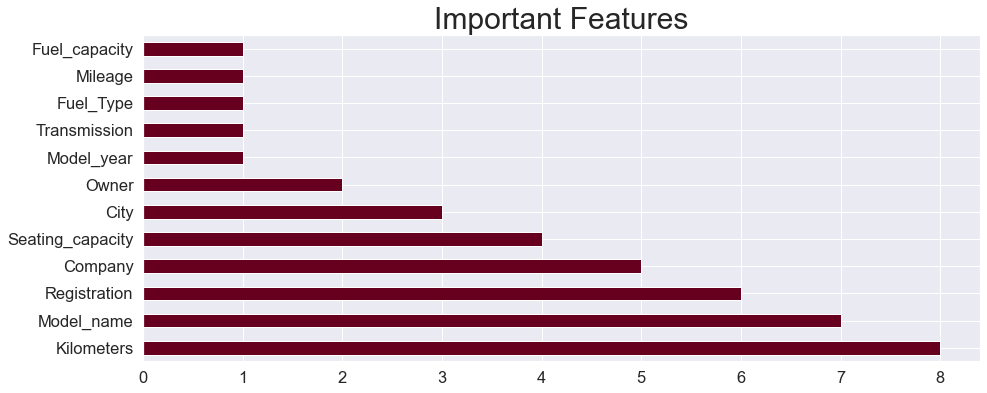

In [30]:
#plot graph of feature importances for better visualization

plt.figure(figsize=(15,6))
imp_feature = pd.Series(fit.ranking_, index = X.columns)
imp_feature.nlargest(16).plot(kind = 'barh', cmap = 'PuRd_r')
plt.title('Important Features', fontsize=30)
plt.show()

Inference:

1) Here we can see feature importance.

## <h1><center><font color=purple>Split the dataset into Taining and Test</font><br></center></h1>

In [31]:
#Splitting The Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## <h1><center><font color=purple>Model Building</font><br></center></h1>

In [32]:
import lightgbm as lgb
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso , KNeighborsRegressor ,GradientBoostingRegressor, AdaBoostRegressor]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

In [33]:
# create a new DataFrame from the above lists

MLModels_df = pd.DataFrame({"Models": [ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Ridge', 'Lasso' , 'KNeighborsRegressor', 'GradientBoostingRegressor', 'AdaBoostRegressor'],
                           "Mean Squared Error": mse,
                           "Root Mean Squared Error": rmse,
                           "Explained Variance Score": evs,
                           "R-Square Score / Accuracy": r_square_score}).round(3).sort_values(by=[ "R-Square Score / Accuracy"], ascending=False)

MLModels_df.set_index('Models', inplace=True)
MLModels_df

Mean Squared Error  Root Mean Squared Error  \
Models                                                                    
Random Forest Regressor                  0.090                    0.300   
GradientBoostingRegressor                0.112                    0.335   
Support Vector Rregression               0.163                    0.403   
Decision Tree Regressor                  0.165                    0.407   
KNeighborsRegressor                      0.216                    0.465   
AdaBoostRegressor                        0.238                    0.487   
Linear Regression                        0.259                    0.509   
Ridge                                    0.259                    0.509   
Lasso                                    1.015                    1.007   

                            Explained Variance Score  \
Models                                                 
Random Forest Regressor                        0.911   
GradientBoostingRegressor                      0.889   
Support Vector Rregression                     0.841   
Decision Tree Regressor                        0.837   
KNeighborsRegressor                            0.787   
AdaBoostRegressor                              0.778   
Linear Regression                              0.745   
Ridge                                          0.745   
Lasso                                          0.000   

                            R-Square Score / Accuracy  
Models                                                 
Random Forest Regressor                         0.911  
GradientBoostingRegressor                       0.889  
Support Vector Rregression                      0.840  
Decision Tree Regressor                         0.837  
KNeighborsRegressor                             0.787  
AdaBoostRegressor                               0.766  
Linear Regression                               0.744  
Ridge                                           0.744  
Lasso                                          -0.000

Inference:

1) Here we come to know that Random Forest Regressor gives the maximum Model accuracy , So we will go with this Models.

## <h1><center><font color=purple>Hyperparameter Tuning</font><br></center></h1>

In [34]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [35]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [37]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [38]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
print('Best_score : {}, using_Parameters {}'.format(rf_random.best_score_,rf_random.best_params_))

Best_score : -0.0717792174191226, using_Parameters {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}


## <h1><center><font color=purple>Train the Model on the Training Set</font><br></center></h1>

In [40]:
# Building the model using above best parameter
RF_model = RandomForestRegressor(n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 1,
                               max_features = 'sqrt', max_depth = 25)
RF_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

## <h1><center><font color=purple>Predict the Test Set Results</font><br></center></h1>

In [41]:
y_predictions_RF = RF_model.predict(X_test)
print(y_predictions_RF)

[ 0.25281816  0.49519463 -0.04962442 ... -0.67114657  0.19947686
 -0.0758103 ]


## <h1><center><font color=purple>Evaluate the Model</font><br></center></h1>

In [42]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predictions_RF))
print('Mean Squareed Error: ', mean_squared_error(y_test, y_predictions_RF))
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test, y_predictions_RF)))
print('\nExplained Variance Score: ', explained_variance_score(y_true= y_test, y_pred= y_predictions_RF))

Mean Absolute Error:  0.19604580392498902
Mean Squareed Error:  0.0969349559886088
Root Mean Square Error:  0.3113437906697495

Explained Variance Score:  0.9044513705205428


## <h1><center><font color=purple>Plot the Results</font><br></center></h1>

Text(0.5, 1.0, 'Actual vs. Predicted')

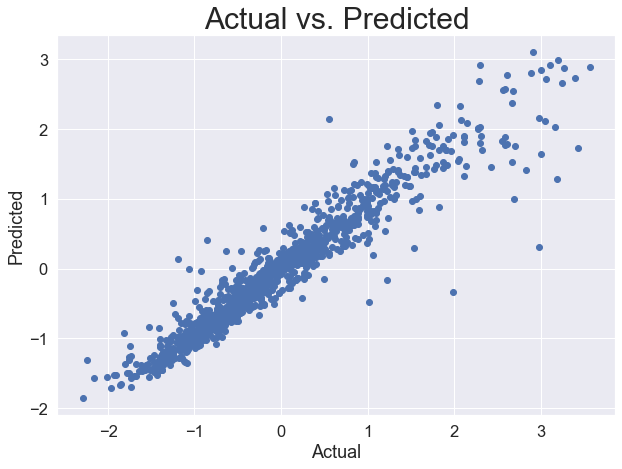

In [43]:
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_predictions_RF)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted',fontsize = 30)